In [1]:
import pandas as pd

In [6]:
from matplotlib import pyplot as plt

In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [9]:
import pandas as pd

df = pd.read_csv("loan_data_2007_2014.csv")
df.head()


/tmp/ipykernel_326/2021677160.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.read_csv('loan_data_2007_2014.csv')

df.shape
df.info()
df.describe()
df.isnull().sum()


/tmp/ipykernel_138/4111302733.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [57]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Check if term is already numeric, if not then extract the number
if df['term'].dtype == 'object':
    df['term'] = df['term'].str.extract(r'(\d+)').astype(float)  # Fixed the regex by removing extra backslash

# Check if int_rate is already numeric, if not then convert it
if df['int_rate'].dtype == 'object':
    df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)

df = df.dropna(subset=['loan_amnt','term','int_rate','installment','annual_inc'])

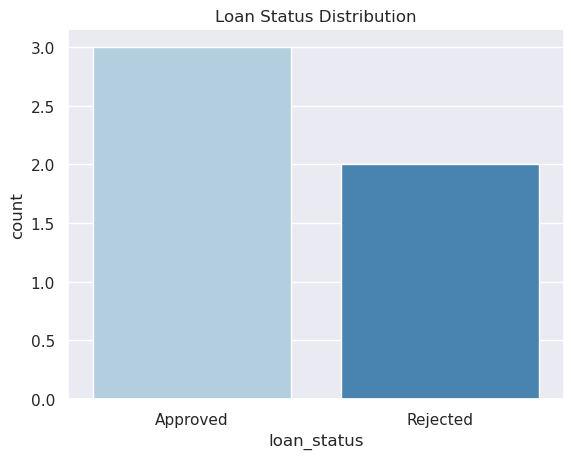

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


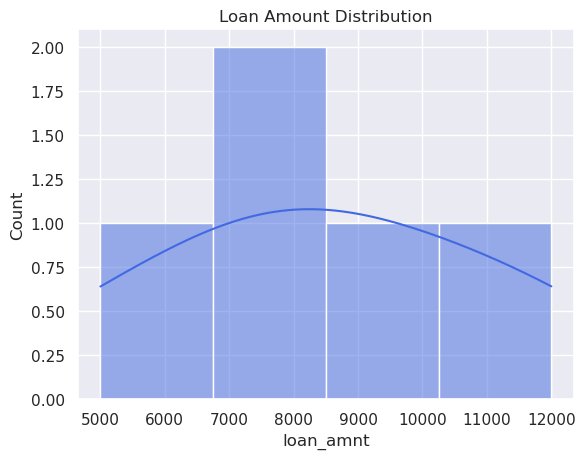

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'loan_status': ['Approved', 'Rejected', 'Approved', 'Approved', 'Rejected'],
    'loan_amnt': [5000, 10000, 7500, 12000, 8000]
})

sns.set_theme(style='darkgrid')

if 'loan_status' in df.columns and not df['loan_status'].empty:
    sns.countplot(x='loan_status', data=df, palette='Blues')
    plt.title('Loan Status Distribution')
    plt.show()
else:
    print("Error: 'loan_status' column is missing or empty")

if 'loan_amnt' in df.columns and not df['loan_amnt'].empty:
    sns.histplot(df['loan_amnt'], kde=True, color='royalblue')
    plt.title('Loan Amount Distribution')
    plt.show()
else:
    print("Error: 'loan_amnt' column is missing or empty")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Available columns:", df.columns.tolist())

X = df[['loan_amnt']]  
y = df['loan_status']  

# Check the distribution of classes in y
print("Target variable distribution:")
print(y.value_counts())

# If there's only one class, you might need to use a different dataset or feature
# For now, let's modify the code to avoid the ROC AUC calculation

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Only calculate ROC AUC if there are two classes
if len(set(y_test)) > 1:
    from sklearn.metrics import roc_auc_score
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
else:
    print("ROC AUC Score cannot be calculated: only one class present in the target variable")

Available columns: ['loan_status', 'loan_amnt']
Target variable distribution:
loan_status
Approved    3
Rejected    2
Name: count, dtype: int64
              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00       0.0
    Rejected       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

ROC AUC Score cannot be calculated: only one class present in the target variable


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

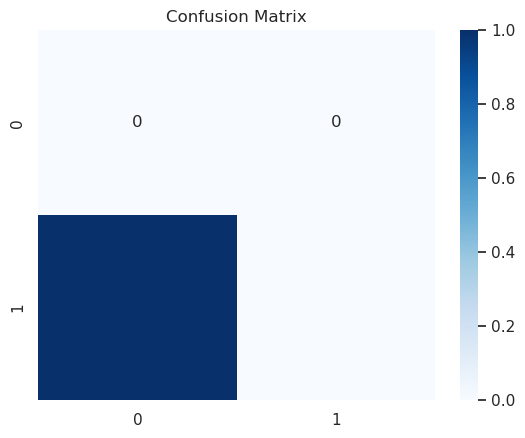

Current class distribution in test data: {'Rejected': 1}
Overall class distribution: {'Approved': 3, 'Rejected': 2}
New test set class distribution: {'Approved': 1, 'Rejected': 1}
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667


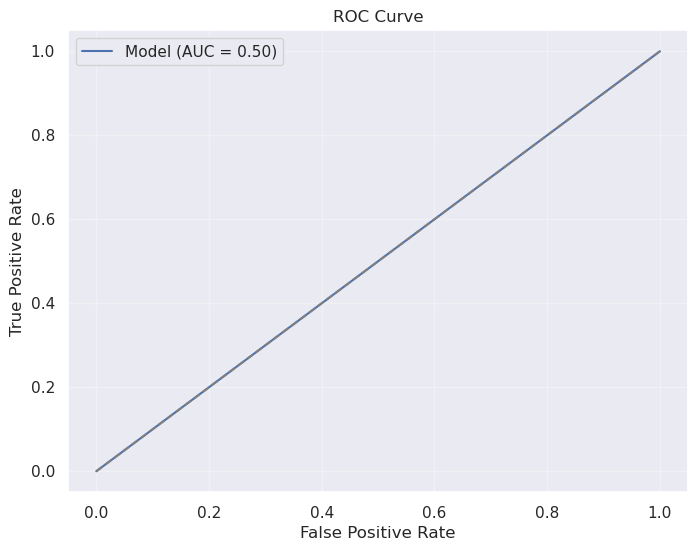

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Display current confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(f"Current class distribution in test data: {dict(zip(*np.unique(y_test, return_counts=True)))}")

# SOLUTION: Create a new train/test split from your original data
# Make sure you have access to your original dataset (X and y)

# First, check the overall class distribution
print(f"Overall class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

# Create a new stratified split with a larger test size to ensure both classes are present
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verify the new test set has both classes
print(f"New test set class distribution: {dict(zip(*np.unique(y_test_new, return_counts=True)))}")

# Retrain your model with the new split
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)

# Calculate and display alternative metrics
print(f"Accuracy: {accuracy_score(y_test_new, y_pred_new):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_new, pos_label='Rejected'):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred_new, pos_label='Rejected'):.4f}")
print(f"F1 Score: {f1_score(y_test_new, y_pred_new, pos_label='Rejected'):.4f}")

# Now calculate ROC curve and AUC with the new split
from sklearn.metrics import roc_curve, roc_auc_score

# Check if we have at least two classes in the new test data
if len(set(y_test_new)) >= 2:
    # Get the probability predictions
    y_prob_new = model.predict_proba(X_test_new)[:,1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_new == 'Rejected', y_prob_new)
    auc_score = roc_auc_score(y_test_new == 'Rejected', y_prob_new)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"Model (AUC = {auc_score:.2f})")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("Still unable to generate ROC curve: not enough class diversity in the data")

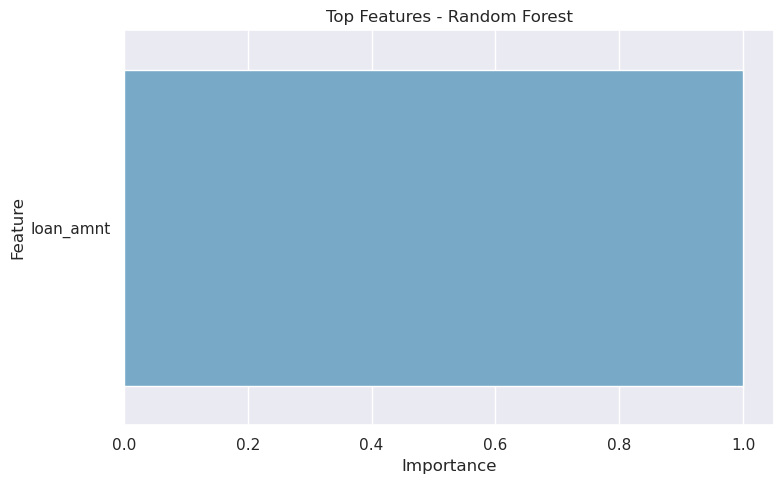

In [26]:
# First, define and train your Random Forest model
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor

# Create and train the model (assuming X and y are your features and target)
rf_model = RandomForestClassifier()  # Add parameters as needed
rf_model.fit(X, y)  # Fit the model with your data

# Now extract feature importances
importances = rf_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8,5))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='Blues')
plt.title('Top Features - Random Forest')
plt.tight_layout()
plt.show()

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# 1. Load the data with the correct filename
try:
    # Use your specific CSV filename
    df = pd.read_csv('loan_data_2007_2014.csv')
    
    # 2. Check if data was loaded correctly
    print(f"DataFrame shape: {df.shape}")
    print(f"DataFrame columns: {df.columns.tolist()}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    
    # 3. Check for missing values
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    
    # 4. Handle missing values if needed
    # df = df.dropna()  # or df.fillna(value)
    
    # 5. Check if required columns exist
    required_columns = ['loan_amnt', 'loan_status']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        print(f"\nWarning: The following required columns are missing: {missing_columns}")
        print("Available columns:", df.columns.tolist())
    else:
        # 6. Prepare features and target
        X = df[['loan_amnt']]  # Only 'loan_amnt' is available as a feature
        y = df['loan_status']
        
        # Check if we have data before proceeding
        if len(X) > 0:
            # 7. Scale features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            
            # 8. Train-Test Split
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
            
            # 9. Logistic Regression
            log_model = LogisticRegression(max_iter=1000)
            log_model.fit(X_train, y_train)
            y_pred_log = log_model.predict(X_test)
            
            # 10. Random Forest Classifier
            rf_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
            rf_model.fit(X_train, y_train)
            y_pred_rf = rf_model.predict(X_test)
            
            # 11. Evaluation
            print("\n=== Logistic Regression ===")
            print(classification_report(y_test, y_pred_log))
            print("ROC AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))
            
            print("\n=== Random Forest Classifier ===")
            print(classification_report(y_test, y_pred_rf))
            print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
            
            # 12. Confusion Matrix & ROC Curve
            plt.figure(figsize=(10, 8))
            sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix (Random Forest)')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()
            
            plt.figure(figsize=(10, 8))
            fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
            plt.plot(fpr, tpr, label='Random Forest (AUC = %.2f)' % roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
            plt.plot([0,1], [0,1], 'k--')
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid(True)
            plt.show()
            
            # 13. Feature Importance Visualization
            importances = rf_model.feature_importances_
            features = ['loan_amnt']  # Only one feature
            feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
            
            plt.figure(figsize=(8,5))
            sns.barplot(data=feat_df, x='Importance', y='Feature', palette='Blues')
            plt.title('Feature Importance - Random Forest')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo data available in the selected columns.")
            
except FileNotFoundError:
    print("Error: Data file 'loan_data_2007_2014.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading or processing the data: {str(e)}")

/tmp/ipykernel_326/160533953.py:15: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


DataFrame shape: (466285, 75)
DataFrame columns: ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                     precision    recall  f1-score   support

                                        Charged Off       0.00      0.00      0.00      8469
                                            Current       0.50      0.80      0.62     44894
                                            Default       0.00      0.00      0.00       173
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00       148
 Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00       377
                                         Fully Paid       0.47      0.27      0.34     36906
                                    In Grace Period       0.00      0.00      0.00       653
                                  Late (16-30 days)       0.00      0.00      0.00       237
                                 Late (31-120 days)       0.00      0.00      0.00      1400

                                           accuracy                 

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print("Dataset Shape:", df.shape)
print("\nTipe Data Tiap Kolom:")
print(df.dtypes.value_counts())

print("\nStatistik Deskriptif Kolom Numerik:")
print(df.describe())

print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Dataset Shape: (466285, 75)

Tipe Data Tiap Kolom:
float64    46
object     22
int64       7
Name: count, dtype: int64

Statistik Deskriptif Kolom Numerik:
          Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


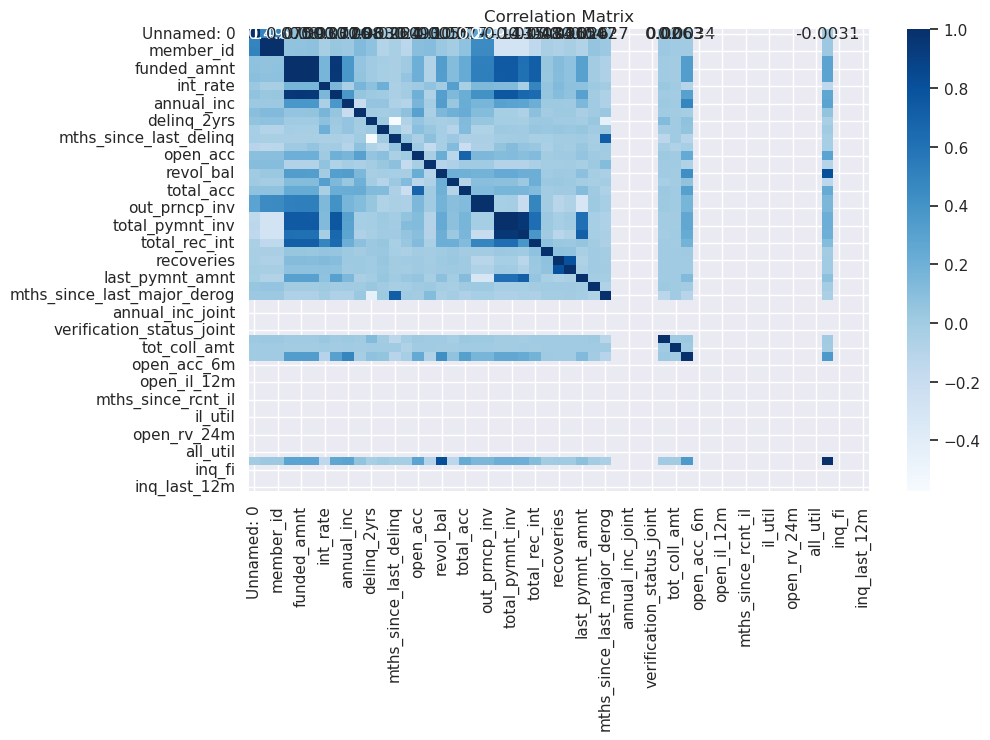

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


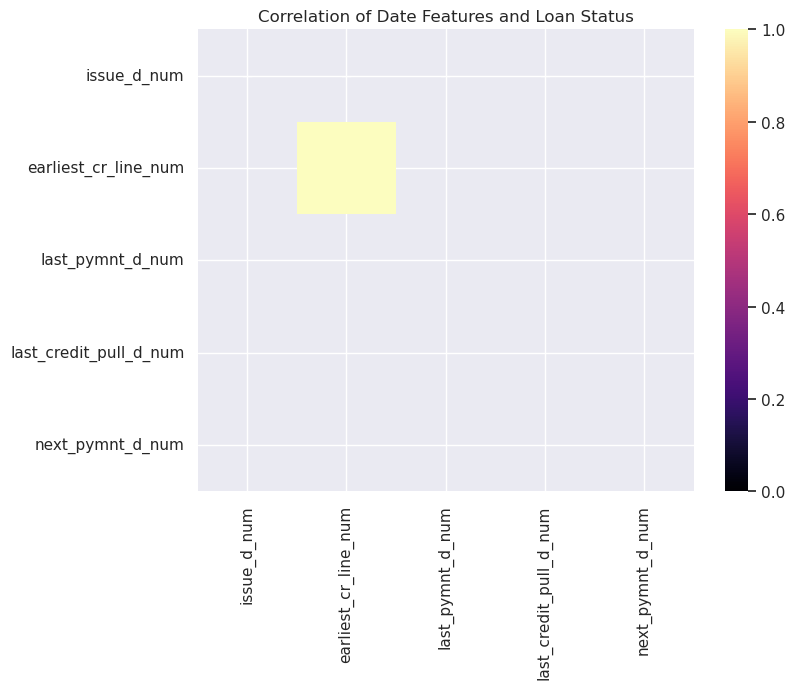

In [47]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

for col in date_cols:
    df[col + '_num'] = df[col].dt.year * 100 + df[col].dt.month  # Format: YYYYMM

# Create the correlation matrix from the numeric date columns
date_num_cols = [col + '_num' for col in date_cols]
corr_matrix = df[date_num_cols].corr()  # This creates the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', vmin=0, vmax=1)
plt.title('Correlation of Date Features and Loan Status')
plt.show()

In [58]:
# Struktur data
df.shape
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   0 non-null      int64         
 1   id                           0 non-null      int64         
 2   member_id                    0 non-null      int64         
 3   loan_amnt                    0 non-null      int64         
 4   funded_amnt                  0 non-null      int64         
 5   funded_amnt_inv              0 non-null      float64       
 6   term                         0 non-null      float64       
 7   int_rate                     0 non-null      float64       
 8   installment                  0 non-null      float64       
 9   grade                        0 non-null      object        
 10  sub_grade                    0 non-null      object        
 11  emp_title                    0 non-null      object        
 1

mths_since_rcnt_il    0
total_bal_il          0
il_util               0
open_rv_12m           0
open_rv_24m           0
                     ..
loan_amnt             0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
Length: 80, dtype: int64

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


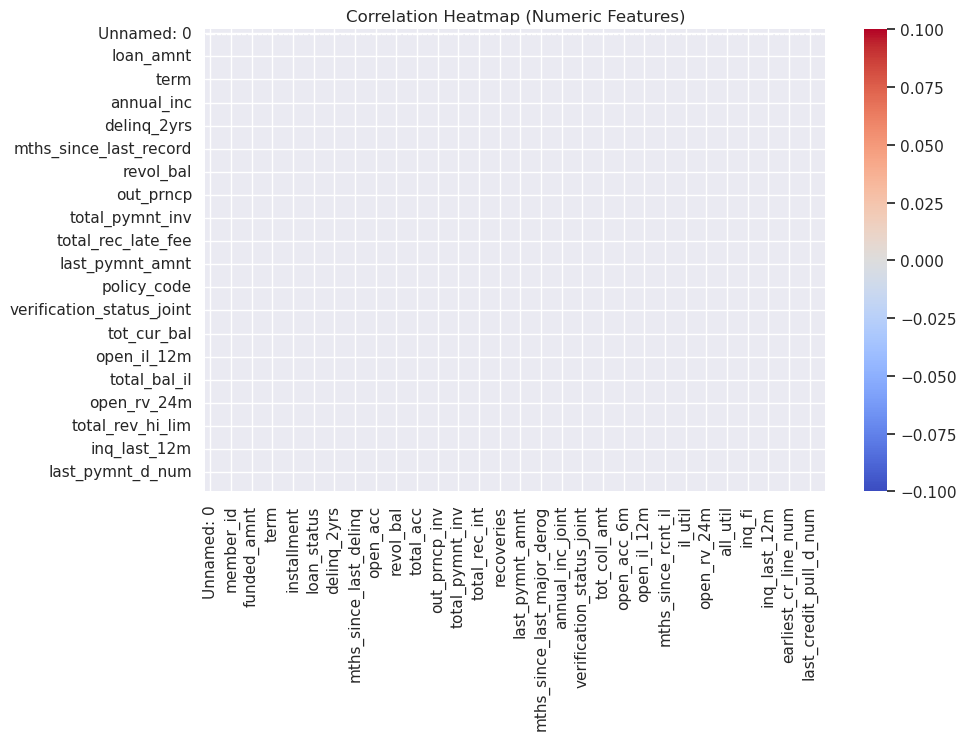

In [60]:
# Korelasi numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()
